In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 1. Load the Datasets
df = pd.read_csv('hair_fall.csv')
df1 = pd.read_csv('hairfall2.csv')
df2 = pd.read_csv('hairfall3.csv')


from sklearn.preprocessing import LabelEncoder

# Rename the column
df2.rename(columns={'Do you have hair fall problem ?': 'Hair Loss'}, inplace=True)

# List of columns to label encode
columns_to_encode = [
    'What is your name ?', 'What is your gender ?', 'Hair Loss',
    'Is there anyone in your family having a hair fall problem or a baldness issue?',
    'Did you face any type of chronic illness in the past?', 'Do you stay up late at night?',
    'Do you have any type of sleep disturbance?', 'Do you think that in your area water is a reason behind hair fall problems?',
    'Do you use chemicals, hair gel, or color in your hair?', 'Do you have anemia?',
    'Do you have too much stress', 'What is your food habit'
]

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df2[column] = le.fit_transform(df2[column])

df2.head()

df2.drop(columns=['Timestamp', 'What is your name ?'], inplace=True)

df['Label'] = df['Hair Loss']
df1['Label'] = df1['Label']  # Already named correctly in df1


df1.rename(columns={'Age(Yrs.)': 'Age'}, inplace=True)  # Align target column name
df2.rename(columns={'What is your age ?': 'Age', 'What is your gender ?': 'Gender', 'Hair Loss': 'Label'}, inplace=True) 

In [2]:
df1['Enviromental_factor'] = df1['Radiation']

In [3]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Radiation', 'Hairline_Pattern',
       'Hairstyle', 'Density', 'Hair_Fall_Rate', 'Scalp_Infection',
       'Pain_Itch', 'Nutrition', 'Weight_Loss', 'Sleeping_Pattern',
       'Chemical_Products', 'Medication', 'Region', 'Label',
       'Enviromental_factor'],
      dtype='object')

In [4]:
df.columns

Index(['Id', 'Genetics', 'Hormonal Changes', 'Medical Conditions',
       'Medications & Treatments', 'Nutritional Deficiencies', 'Stress', 'Age',
       'Poor Hair Care Habits', 'Environmental Factors', 'Smoking',
       'Weight Loss', 'Hair Loss', 'Label'],
      dtype='object')

In [5]:
import pandas as pd


# Renaming columns in df1
df.rename(columns={
    'Medications & Treatments': 'Medication',
    'Nutritional Deficiencies': 'Nutrition',
    'Environmental Factors': 'Enviromental_factor'
}, inplace=True)

# Renaming columns in df2
df2.rename(columns={
    'Do you have too much stress': 'Stress',
    'What is your food habit': 'Food_Habit',
    'Is there anyone in your family having a hair fall problem or a baldness issue?': 'Genetics',
    'Do you stay up late at night?': 'Sleeping_Pattern',
    'Do you use chemicals, hair gel, or color in your hair?':  'Chemical_Products'

}, inplace=True)



df.drop(columns=['Hair Loss','Id'], inplace=True)

df1.drop(columns=['Region','Radiation'], inplace=True)



In [6]:
df.columns

Index(['Genetics', 'Hormonal Changes', 'Medical Conditions', 'Medication',
       'Nutrition', 'Stress', 'Age', 'Poor Hair Care Habits',
       'Enviromental_factor', 'Smoking', 'Weight Loss', 'Label'],
      dtype='object')

In [7]:
df1.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor'],
      dtype='object')

In [8]:
df2.columns

Index(['Age', 'Gender', 'Label', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Sleeping_Pattern', 'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Chemical_Products', 'Do you have anemia?', 'Stress', 'Food_Habit'],
      dtype='object')

In [9]:


# Merge df1 and df2 on common columns (Age, Gender, Label, Sleeping_Pattern, Chemical_Products)
merged_df1 = pd.merge(df1, df2, on=['Age', 'Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products'], how='outer')

# Now merge the above result with df on common columns (Age, Label, Genetics, Stress)
main_data = pd.merge(merged_df1, df, on=['Age', 'Label', 'Genetics', 'Stress','Enviromental_factor','Medication','Nutrition'], how='outer')

In [10]:
main_data.columns

Index(['Gender', 'Age', 'Marital_Status', 'Father', 'Mother', 'Grand_Father',
       'Grand_Mother', 'Siblings', 'Pregnant', 'Hairline_Pattern', 'Hairstyle',
       'Density', 'Hair_Fall_Rate', 'Scalp_Infection', 'Pain_Itch',
       'Nutrition', 'Weight_Loss', 'Sleeping_Pattern', 'Chemical_Products',
       'Medication', 'Label', 'Enviromental_factor', 'Genetics',
       'Did you face any type of chronic illness in the past?',
       'Do you have any type of sleep disturbance?',
       'Do you think that in your area water is a reason behind hair fall problems?',
       'Do you have anemia?', 'Stress', 'Food_Habit', 'Hormonal Changes',
       'Medical Conditions', 'Poor Hair Care Habits', 'Smoking',
       'Weight Loss'],
      dtype='object')

In [11]:
main_data.duplicated().sum()

455

In [12]:
main_data.drop_duplicates(inplace=True)

In [13]:
main_data.isnull().sum()

Gender                                                                          998
Age                                                                               1
Marital_Status                                                                 1481
Father                                                                         1481
Mother                                                                         1481
Grand_Father                                                                   1481
Grand_Mother                                                                   1481
Siblings                                                                       1481
Pregnant                                                                       1481
Hairline_Pattern                                                               1481
Hairstyle                                                                      1481
Density                                                                     

In [14]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [15]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1,2.0,20.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2,0.0,20.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
3,0.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
4,0.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2609,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,0.0,9.0,1.0,1.0,1.0
2610,0.0,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,0.0,1.0
2611,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
2612,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0


In [16]:
from sklearn.utils import resample

# Assuming main_data is your merged dataset with 554 rows and 37 columns

# 1. Randomly resample (with replacement) to increase the number of rows
# Upsample to 30,000 rows using resampling

# Create a dataframe with 30000 rows by resampling with replacement
main_data = resample(main_data, 
                          replace=True,       # Sample with replacement
                          n_samples=70000,    # Increase number of rows to 30,000
                          random_state=42)    # For reproducibility

# 2. Noise Injection on Numerical Columns (e.g., Age, Genetics, Medication)
# Let's add random noise to numerical columns

numerical_columns = ['Age', 'Genetics', 'Medication', 'Enviromental_factor', 'Nutrition']  # Example numerical columns

for col in numerical_columns:
    noise = np.random.normal(0, 0.05, size=main_data[col].shape)  # Adding random noise with small standard deviation
    main_data[col] += noise  # Add the noise

# 3. For Categorical Data (Optional): Slightly modify categorical values to add variations
categorical_columns = ['Gender', 'Label', 'Sleeping_Pattern', 'Chemical_Products', 'Stress']  # Example categorical columns

for col in categorical_columns:
    main_data[col] = main_data[col].apply(lambda x: x if np.random.rand() > 0.05 else np.random.choice(main_data[col].unique()))

# Display the augmented dataset shape and a sample
print(main_data.shape)  # Should print (30000, 37)
print(main_data.head())  # Show first few rows of the augmented data


(70000, 34)
      Gender        Age  Marital_Status  Father  Mother  Grand_Father  \
957      1.0  19.949351             0.0     0.0     0.0           0.0   
1748     0.0  42.018335             0.0     0.0     0.0           0.0   
1301     0.0  14.886359             0.0     0.0     0.0           0.0   
1264     1.0  14.943830             0.0     0.0     0.0           0.0   
2093     0.0  49.000250             0.0     0.0     0.0           0.0   

      Grand_Mother  Siblings  Pregnant  Hairline_Pattern  ...  \
957            0.0       0.0       0.0               1.0  ...   
1748           0.0       0.0       0.0               1.0  ...   
1301           0.0       0.0       0.0               1.0  ...   
1264           0.0       0.0       0.0               1.0  ...   
2093           0.0       0.0       0.0               1.0  ...   

      Do you have any type of sleep disturbance?  \
957                                          1.0   
1748                                         1.0   
13

In [17]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,19.949351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,42.018335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,14.886359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.943830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.000250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,24.872358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.015101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.996477,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,37.952377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [18]:
main_data.isnull().sum()

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [19]:
numerical_columns = ['Age', 'Hair_Fall_Rate']

# Fill numerical columns with median
main_data[numerical_columns] = main_data[numerical_columns].apply(lambda x: x.fillna(x.median()) if x.dtype != 'object' else x)

# Columns to treat as categorical (binary)
categorical_columns = ['Gender', 'Marital_Status', 'Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings', 
                       'Pregnant', 'Nutrition','Hairline_Pattern', 'Hairstyle', 'Density', 'Scalp_Infection', 'Pain_Itch', 'Weight_Loss', 
                       'Sleeping_Pattern', 'Chemical_Products', 'Medication', 'Enviromental_factor', 'Genetics', 
                       'Did you face any type of chronic illness in the past?', 'Do you have any type of sleep disturbance?', 
                       'Do you think that in your area water is a reason behind hair fall problems?', 'Do you have anemia?', 
                       'Stress', 'Food_Habit', 'Hormonal Changes', 'Medical Conditions', 'Poor Hair Care Habits', 'Smoking', 'Weight Loss']

# Fill categorical columns (binary values) with mode
main_data[categorical_columns] = main_data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Check if there are still any missing values
print(main_data.isnull().sum())  

Gender                                                                         0
Age                                                                            0
Marital_Status                                                                 0
Father                                                                         0
Mother                                                                         0
Grand_Father                                                                   0
Grand_Mother                                                                   0
Siblings                                                                       0
Pregnant                                                                       0
Hairline_Pattern                                                               0
Hairstyle                                                                      0
Density                                                                        0
Hair_Fall_Rate              

In [20]:
main_data

,Gender,Age,Marital_Status,Father,Mother,Grand_Father,Grand_Mother,Siblings,Pregnant,Hairline_Pattern,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,19.949351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,42.018335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,14.886359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.943830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.000250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,24.872358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.015101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.996477,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,37.952377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [21]:
main_data.drop(columns=['Father', 'Mother', 'Grand_Father', 'Grand_Mother', 'Siblings'], inplace=True)

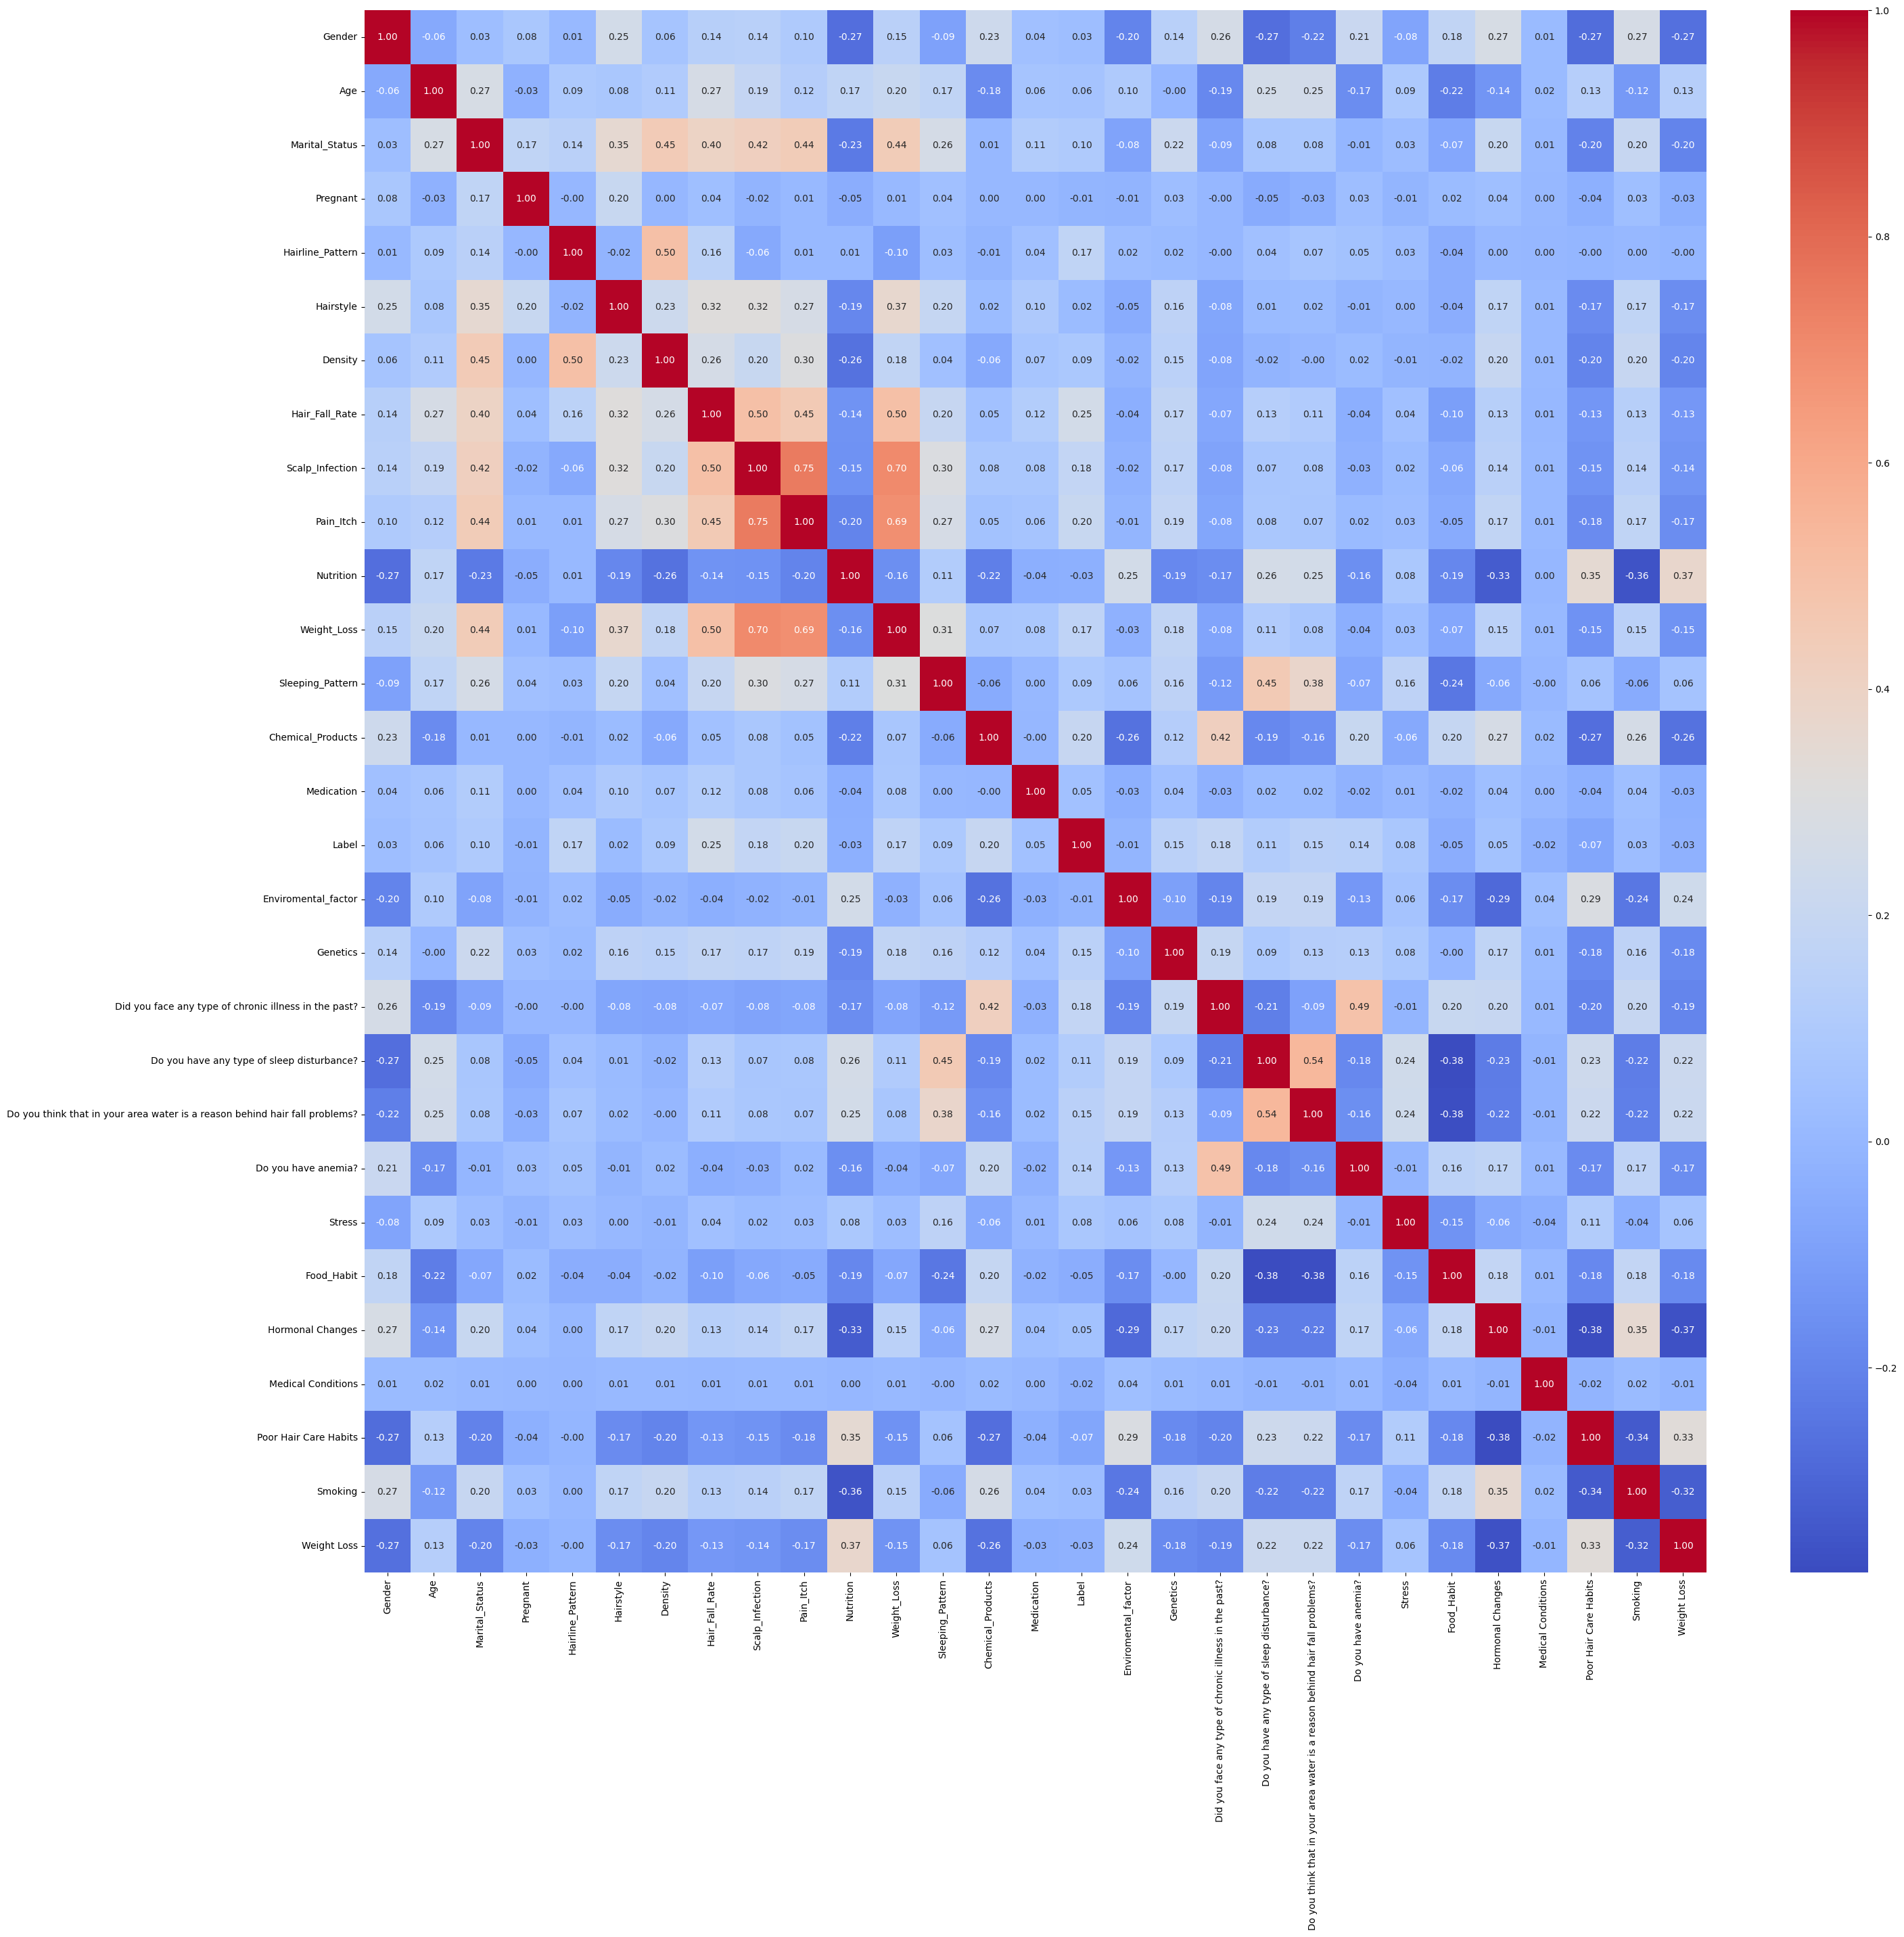

In [22]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [23]:
main_data

,Gender,Age,Marital_Status,Pregnant,Hairline_Pattern,Hairstyle,Density,Hair_Fall_Rate,Scalp_Infection,Pain_Itch,...,Do you have any type of sleep disturbance?,Do you think that in your area water is a reason behind hair fall problems?,Do you have anemia?,Stress,Food_Habit,Hormonal Changes,Medical Conditions,Poor Hair Care Habits,Smoking,Weight Loss
957,1.0,19.949351,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
1748,0.0,42.018335,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0
1301,0.0,14.886359,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,5.0,0.0,1.0,0.0
1264,1.0,14.943830,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2093,0.0,49.000250,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,24.872358,0.0,0.0,1.0,1.0,0.0,50.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2113,0.0,50.015101,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0
302,0.0,25.996477,0.0,0.0,2.0,0.0,1.0,50.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,0.0
2552,0.0,37.952377,0.0,0.0,1.0,0.0,0.0,58.5,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,10.0,1.0,1.0,1.0


In [24]:
main_data['Label'].value_counts()

1    37634
0    31202
2     1164
Name: Label, dtype: int64

In [25]:
main_data.rename(columns={
    'Marital_Status': 'Marital Status',
    'Hairline_Pattern': 'Hairline Pattern',
    'Hair_Fall_Rate': 'Hair Fall Rate',
    'Scalp_Infection': 'Scalp Infection',
    'Pain_Itch': 'Scalp Pain/Itch',
    'Sleeping_Pattern': 'Sleeping Pattern',
    'Chemical_Products': 'Chemical Product Usage',
    'Enviromental_factor': 'Environmental Factor',
    'Did you face any type of chronic illness in the past?': 'Past Chronic Illness',
    'Do you have any type of sleep disturbance?': 'Sleep Disturbance',
    'Do you think that in your area water is a reason behind hair fall problems?': 'Water Quality Issue',
    'Do you have anemia?': 'Anemia',
    'Food_Habit': 'Food Habit',
    'Poor Hair Care Habits': 'Hair Care Habits'
}, inplace=True)

In [26]:
# Calculate the correlation of each column with the label
correlation_with_label = main_data.corr()['Label'].sort_values(ascending=False)

# Display the correlation
print(correlation_with_label)

Label                     1.000000
Hair Fall Rate            0.250434
Scalp Pain/Itch           0.203560
Chemical Product Usage    0.197672
Scalp Infection           0.180799
Past Chronic Illness      0.180063
Hairline Pattern          0.170507
Weight_Loss               0.168723
Genetics                  0.148965
Water Quality Issue       0.146353
Anemia                    0.136977
Sleep Disturbance         0.112453
Marital Status            0.103355
Sleeping Pattern          0.089929
Density                   0.087497
Stress                    0.078783
Age                       0.058037
Hormonal Changes          0.053924
Medication                0.049900
Gender                    0.031346
Smoking                   0.026837
Hairstyle                 0.023373
Pregnant                 -0.011897
Environmental Factor     -0.013532
Medical Conditions       -0.020207
Weight Loss              -0.028924
Nutrition                -0.033904
Food Habit               -0.046486
Hair Care Habits    

In [27]:
# Dropping unnecessary columns
columns_to_drop = ['Marital Status', 'Environmental Factor', 'Sleeping Pattern', 
                   'Scalp Pain/Itch', 'Anemia', 'Medical Conditions', 'Medication','Weight_Loss','Hairstyle','Pregnant']

# Ensure only one "Weight Loss" column is removed (if duplicate exists)
if 'Weight Loss' in main_data.columns:
    columns_to_drop.append('Weight Loss')  # Add only if it exists

# Drop the columns safely
main_data.drop(columns=columns_to_drop, inplace=True)


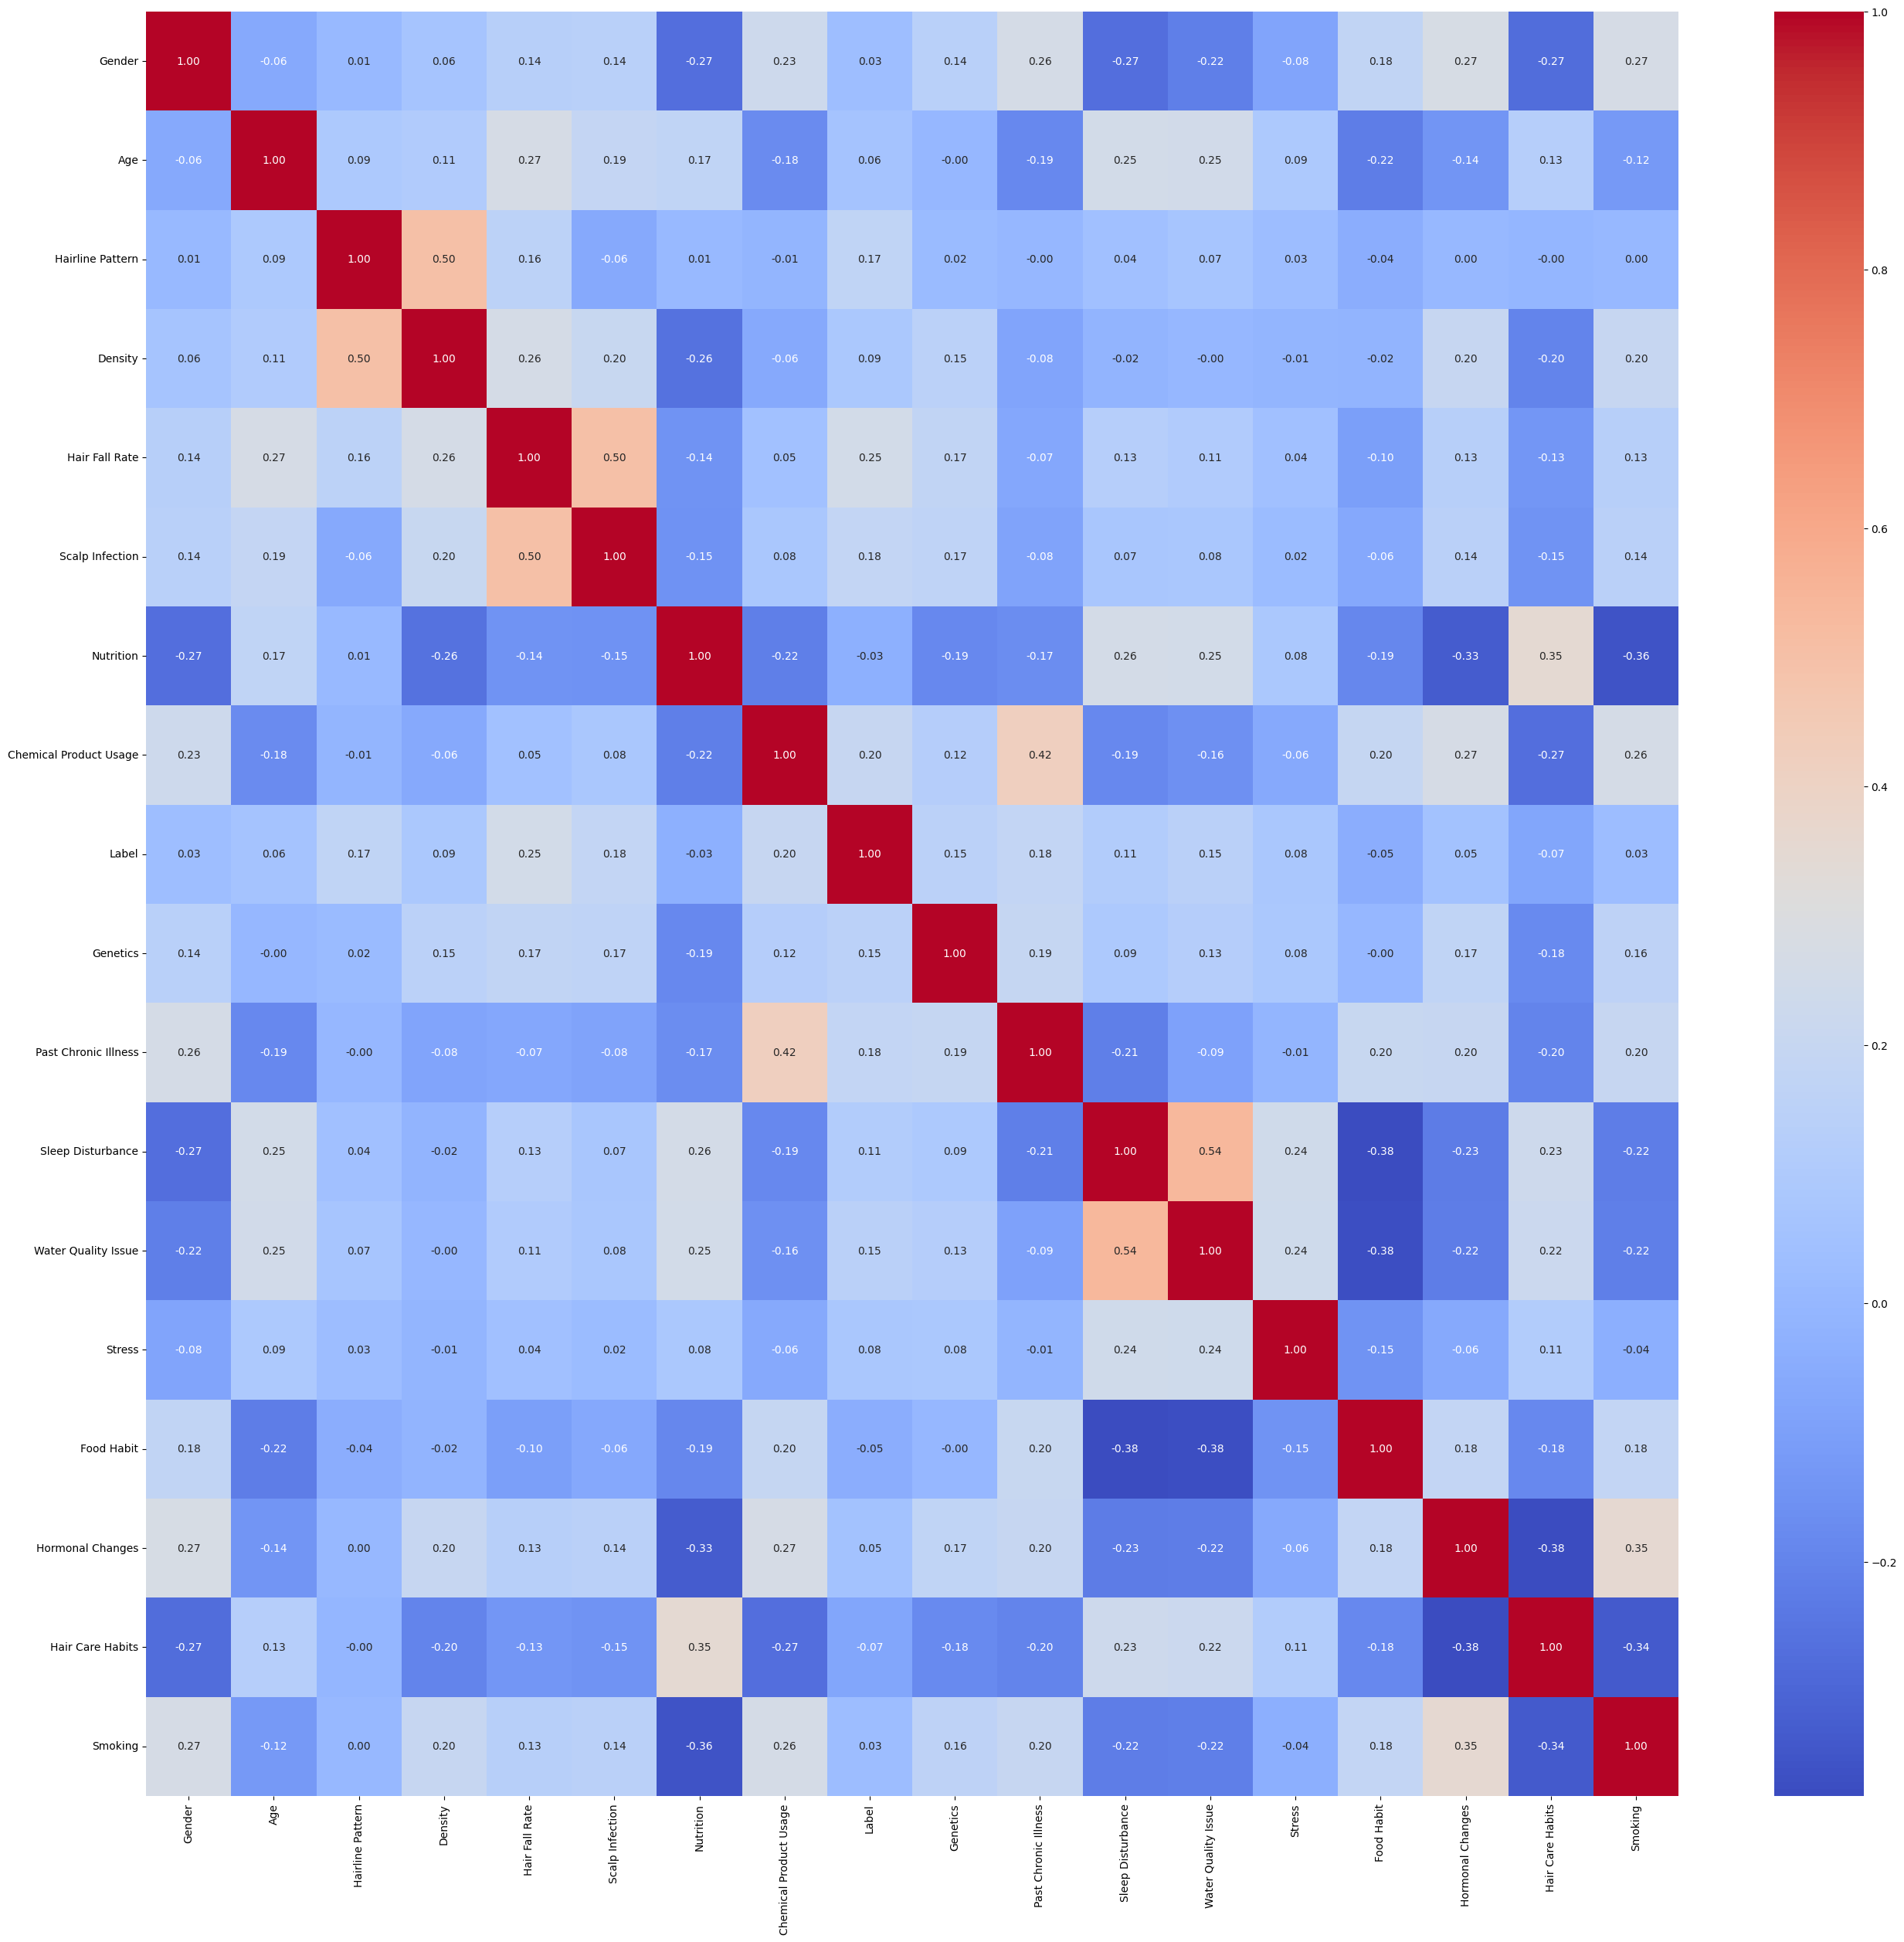

In [28]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = main_data.corr()

# Set the figure size
plt.figure(figsize=(32, 30))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

In [29]:
main_data = main_data.astype(int)
main_data.dtypes

Gender                    int32
Age                       int32
Hairline Pattern          int32
Density                   int32
Hair Fall Rate            int32
Scalp Infection           int32
Nutrition                 int32
Chemical Product Usage    int32
Label                     int32
Genetics                  int32
Past Chronic Illness      int32
Sleep Disturbance         int32
Water Quality Issue       int32
Stress                    int32
Food Habit                int32
Hormonal Changes          int32
Hair Care Habits          int32
Smoking                   int32
dtype: object

In [30]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [31]:
main_data['Hair Fall Rate'].value_counts()

58     48053
40      2945
252     2123
20      1191
50      1154
       ...  
54        23
320       23
28        22
107       20
75        20
Name: Hair Fall Rate, Length: 147, dtype: int64

In [32]:
main_data['Label'].value_counts()

1    37634
0    31202
2     1164
Name: Label, dtype: int64

In [33]:
main_data.to_csv('final_data.csv', index=False)

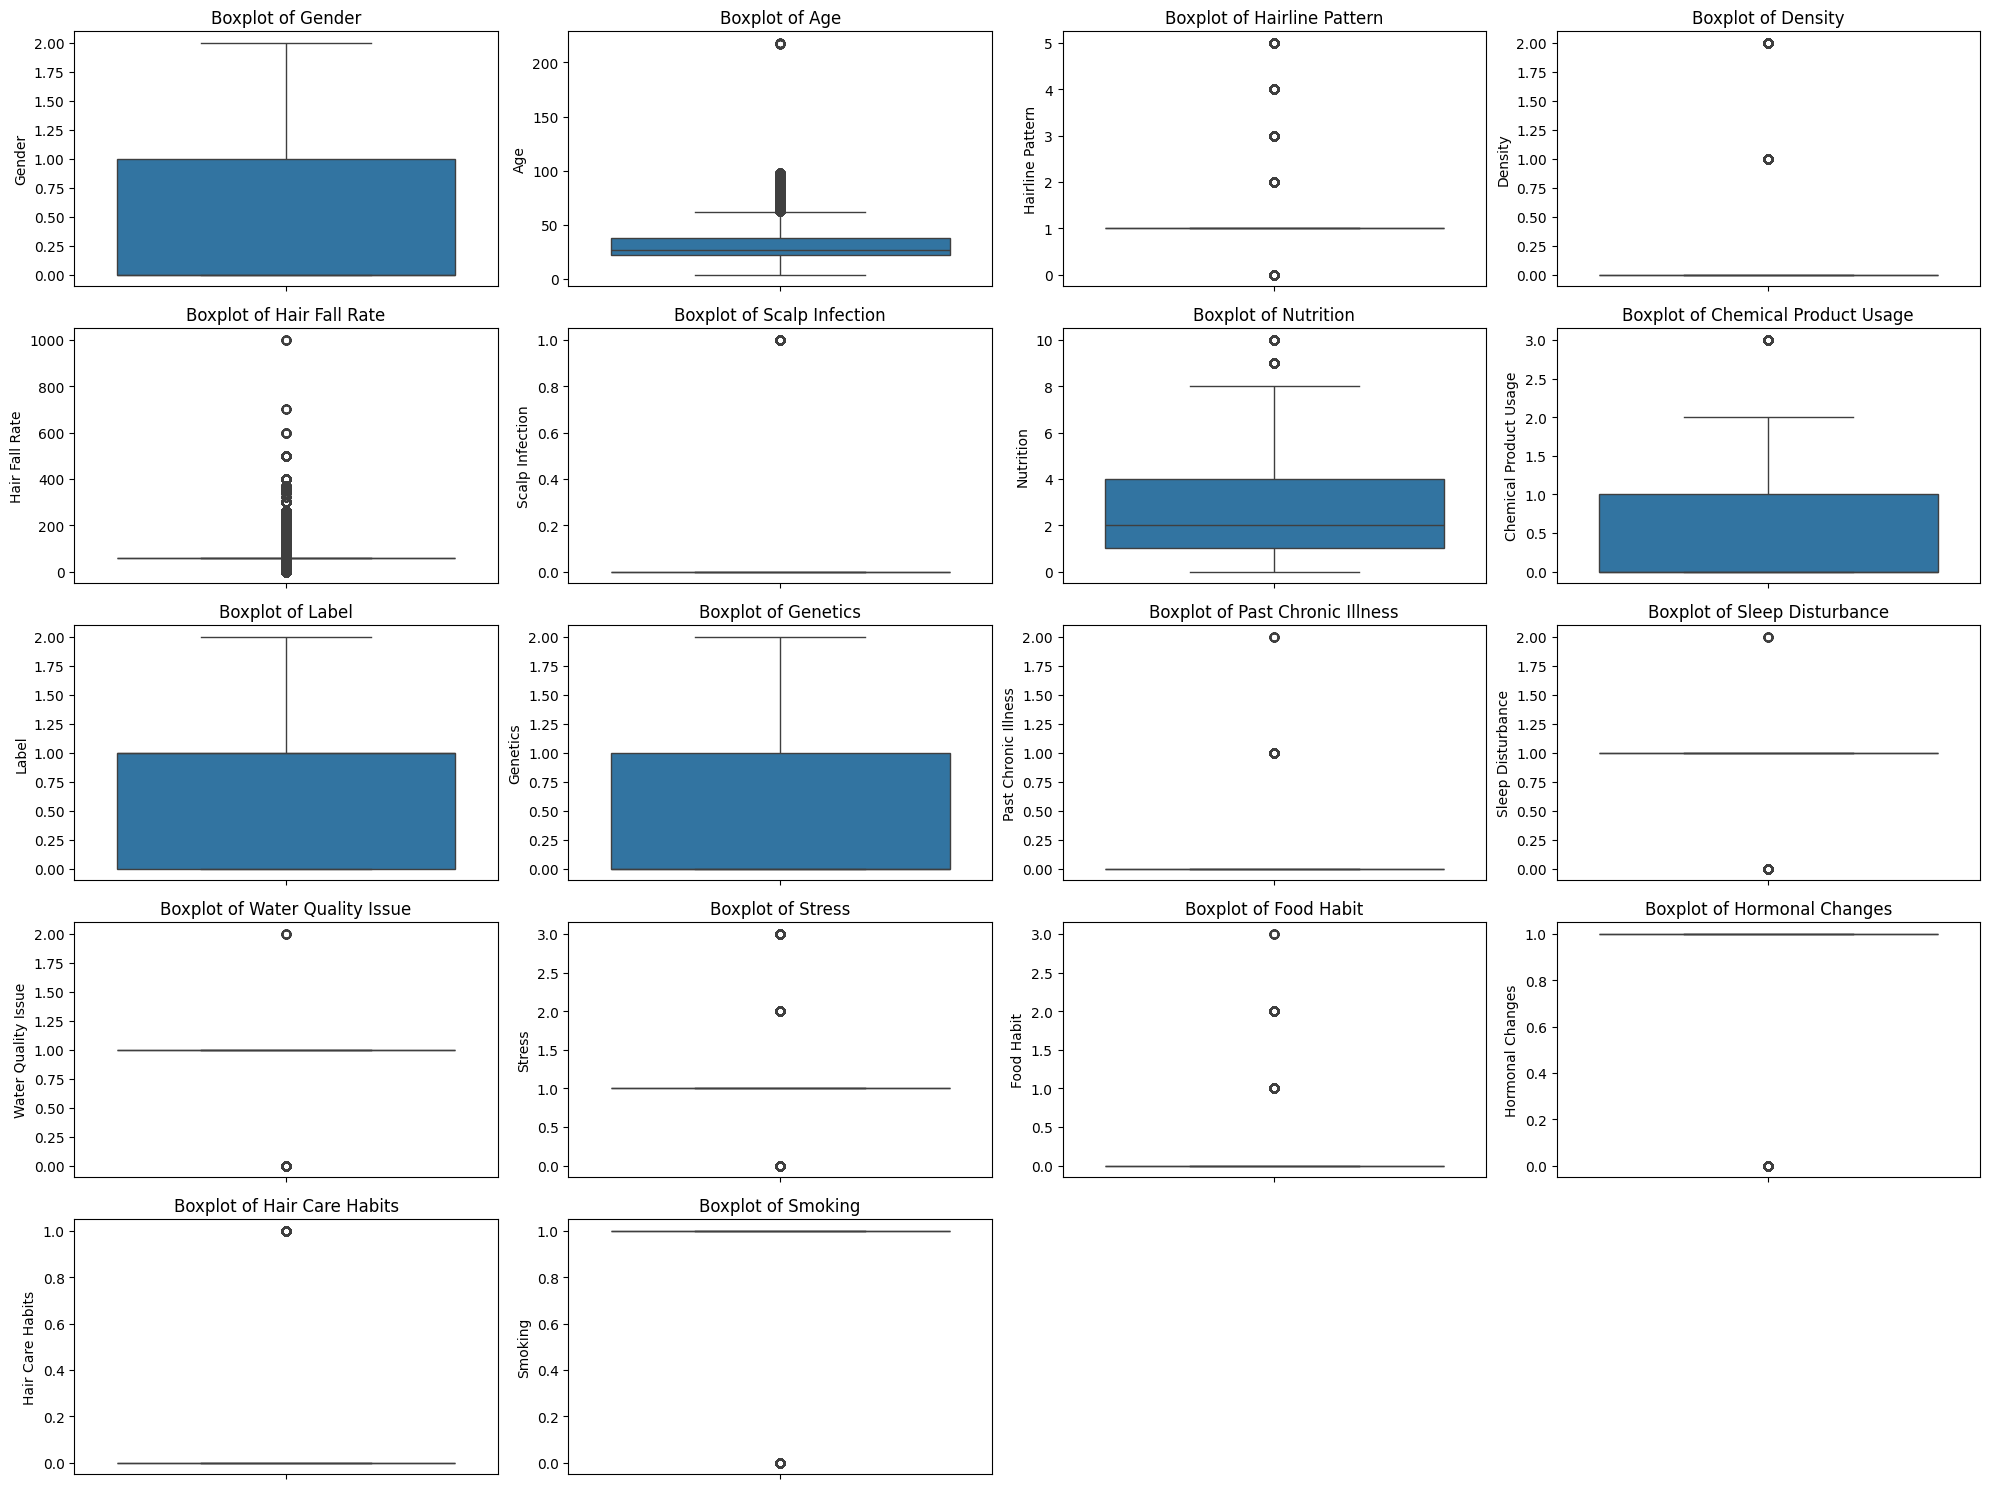

In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a boxplot for each column
for i, column in enumerate(main_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=main_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

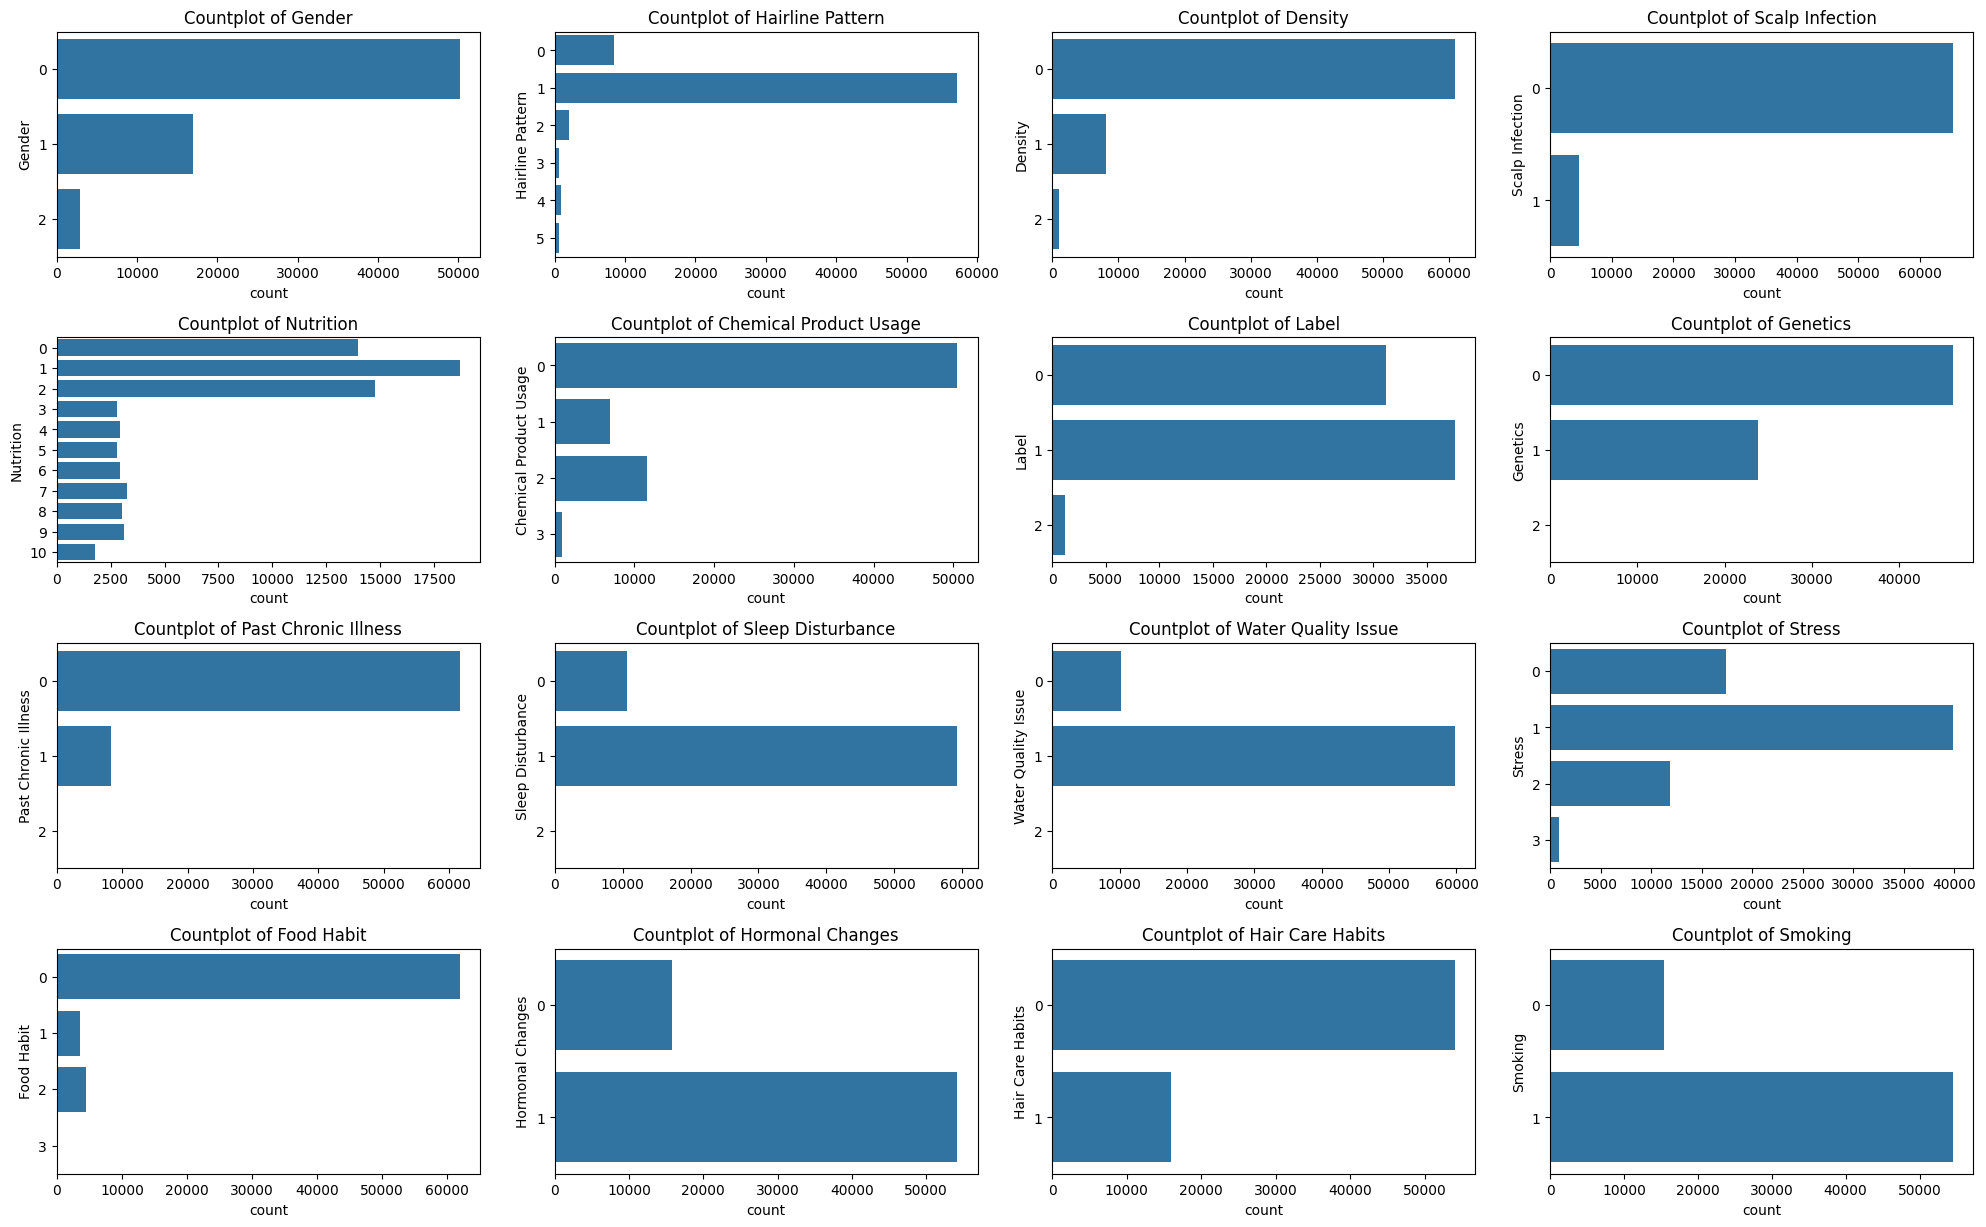

In [35]:
import seaborn as sns

import matplotlib.pyplot as plt

# List of columns to plot
columns_to_plot = [col for col in main_data.columns if col not in ['Age', 'Hair Fall Rate']]

# Set the figure size
plt.figure(figsize=(20, 15))

# Create a count plot for each column
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.countplot(y=main_data[column])
    plt.title(f'Countplot of {column}')

plt.tight_layout()
plt.show()

In [36]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Density', 'Hair Fall Rate',
       'Scalp Infection', 'Nutrition', 'Chemical Product Usage', 'Label',
       'Genetics', 'Past Chronic Illness', 'Sleep Disturbance',
       'Water Quality Issue', 'Stress', 'Food Habit', 'Hormonal Changes',
       'Hair Care Habits', 'Smoking'],
      dtype='object')

In [37]:
main_data.drop(columns=['Scalp Infection', 'Density'], inplace=True)

In [38]:
main_data.astype(int)

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,1,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,0,1,0,1,1,0,1,0,1
2093,0,49,1,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,24,1,50,0,0,0,1,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,1,0,1,1,0,1,1,1,0,1,0,1
2552,0,37,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [39]:
main_data['Smoking'].value_counts()

1    54513
0    15487
Name: Smoking, dtype: int64

In [40]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,1,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,0,1,0,1,1,0,1,0,1
2093,0,49,1,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,24,1,50,0,0,0,1,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,1,0,1,1,0,1,1,1,0,1,0,1
2552,0,37,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [41]:
main_data = main_data.astype(int)
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,1,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,0,1,0,1,1,0,1,0,1
2093,0,49,1,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,24,1,50,0,0,0,1,0,1,1,1,0,1,0,1
2113,0,50,1,58,0,0,0,1,0,1,1,0,0,0,1,1
302,0,25,2,50,1,0,1,1,0,1,1,1,0,1,0,1
2552,0,37,1,58,5,0,1,0,0,1,1,0,0,1,1,1


In [42]:
def get_value_counts_of_all_columns(df):
    # Loop through all columns and get the value counts
    value_counts_dict = {}
    for column in df.columns:
        value_counts_dict[column] = df[column].value_counts()
    return value_counts_dict

# Assuming 'main_data' is your dataset (Pandas DataFrame)
value_counts = get_value_counts_of_all_columns(main_data)

# Print the value counts for all columns
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'Gender':
0    50175
1    17010
2     2815
Name: Gender, dtype: int64


Value counts for column 'Age':
22     3978
21     3558
23     3557
25     3433
24     3092
       ... 
78       13
71       13
218      11
72        9
5         7
Name: Age, Length: 89, dtype: int64


Value counts for column 'Hairline Pattern':
1    57212
0     8469
2     2076
4      928
5      681
3      634
Name: Hairline Pattern, dtype: int64


Value counts for column 'Hair Fall Rate':
58     48053
40      2945
252     2123
20      1191
50      1154
       ...  
54        23
320       23
28        22
107       20
75        20
Name: Hair Fall Rate, Length: 147, dtype: int64


Value counts for column 'Nutrition':
1     18702
2     14765
0     13976
7      3251
9      3130
8      3034
4      2921
6      2916
3      2780
5      2776
10     1749
Name: Nutrition, dtype: int64


Value counts for column 'Chemical Product Usage':
0    50513
2    11642
1     6923
3      922
Name: Chemical Product U

In [43]:
main_data.duplicated().sum()


50362

In [44]:
main_data['Hairline Pattern'].value_counts()

1    57212
0     8469
2     2076
4      928
5      681
3      634
Name: Hairline Pattern, dtype: int64

In [45]:
main_data.drop_duplicates(inplace=True)

In [46]:
main_data.duplicated().sum()

0

In [47]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,1,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,1,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,1,58,1,2,1,0,0,1,1,0,0,1,0,1
1264,1,14,1,58,2,2,1,0,1,0,1,1,0,1,0,1
2093,0,49,1,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1,29,1,58,9,0,0,0,0,1,1,2,0,1,0,1
702,0,11,1,40,0,0,1,0,0,1,1,1,0,1,0,1
539,2,45,0,120,0,2,1,0,0,1,1,1,0,1,0,1
2360,0,24,1,58,4,0,1,0,0,1,1,1,0,0,0,0


In [48]:
main_data['Hairline Pattern'].value_counts()

1    15585
0     2556
2      728
4      297
5      245
3      227
Name: Hairline Pattern, dtype: int64

In [49]:
main_data['Hairline Pattern'] = main_data['Hairline Pattern'] * 2
main_data['Chemical Product Usage'] = main_data['Chemical Product Usage'] * 1.5
main_data['Genetics'] = main_data['Genetics'] * 1.5
main_data['Past Chronic Illness'] = main_data['Past Chronic Illness'] * 1.5
main_data['Hair Care Habits'] = main_data['Hair Care Habits'] * 1.2


In [50]:
main_data = main_data.astype(int)   
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,2,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,2,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,2,58,1,3,1,0,0,1,1,0,0,1,0,1
1264,1,14,2,58,2,3,1,0,1,0,1,1,0,1,0,1
2093,0,49,2,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1,29,2,58,9,0,0,0,0,1,1,2,0,1,0,1
702,0,11,2,40,0,0,1,0,0,1,1,1,0,1,0,1
539,2,45,0,120,0,3,1,0,0,1,1,1,0,1,0,1
2360,0,24,2,58,4,0,1,0,0,1,1,1,0,0,0,0


In [51]:
def get_value_counts_of_all_columns(df):
    # Loop through all columns and get the value counts
    value_counts_dict = {}
    for column in df.columns:
        value_counts_dict[column] = df[column].value_counts()
    return value_counts_dict

# Assuming 'main_data' is your dataset (Pandas DataFrame)
value_counts = get_value_counts_of_all_columns(main_data)

# Print the value counts for all columns
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':")
    print(counts)
    print("\n")

Value counts for column 'Gender':
0    13222
1     4778
2     1638
Name: Gender, dtype: int64


Value counts for column 'Age':
22     1113
21     1033
23      999
24      842
20      835
       ... 
217       4
91        4
82        4
218       3
5         2
Name: Age, Length: 89, dtype: int64


Value counts for column 'Hairline Pattern':
2     15585
0      2556
4       728
8       297
10      245
6       227
Name: Hairline Pattern, dtype: int64


Value counts for column 'Hair Fall Rate':
58     12905
252      577
40       494
20       409
10       320
       ...  
169        7
700        6
87         6
253        6
107        6
Name: Hair Fall Rate, Length: 147, dtype: int64


Value counts for column 'Nutrition':
1     5583
2     4174
0     3486
7      913
9      901
8      894
6      849
4      816
5      773
3      731
10     518
Name: Nutrition, dtype: int64


Value counts for column 'Chemical Product Usage':
0    13067
3     3165
1     2537
4      869
Name: Chemical Product Usage,

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Important Features (Assigning Higher Weights)
feature_weights = {
    'Hair Fall Rate': 19,  # Very Important Feature
    'Genetics': 2,  # Important
    'Stress': 2,  # Important
    'Hormonal Changes': 2,  # Important
    'Sleep Disturbance': 2,  # Important
}

# Prepare Features and Target
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# Apply feature importance weights (Multiply Selected Columns)
for feature, weight in feature_weights.items():
    if feature in X.columns:
        X[feature] = X[feature] * weight  # Boost its value

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)




In [53]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [54]:
y_train_resampled

0        0
1        0
2        0
3        0
4        1
        ..
24343    2
24344    2
24345    2
24346    2
24347    2
Name: Label, Length: 24348, dtype: int32

In [55]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the resampled training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set


RandomForestClassifier(random_state=42)

In [56]:
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)



Validation Accuracy: 0.5998
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       861
           1       0.70      0.63      0.66      1000
           2       0.04      0.11      0.06       103

    accuracy                           0.60      1964
   macro avg       0.47      0.45      0.46      1964
weighted avg       0.65      0.60      0.62      1964

Test Accuracy: 0.5901
Test Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61       811
           1       0.70      0.63      0.67      1053
           2       0.02      0.04      0.03       100

    accuracy                           0.59      1964
   macro avg       0.44      0.43      0.43      1964
weighted avg       0.63      0.59      0.61      1964



In [57]:
y_train_resampled.value_counts()    

0    8116
1    8116
2    8116
Name: Label, dtype: int64

In [58]:
y_train_resampled.value_counts()

0    8116
1    8116
2    8116
Name: Label, dtype: int64

In [59]:
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi = mutual_info_classif(X_train_resampled, y_train_resampled)

# Display MI Scores
for feature, score in zip(X_train_resampled.columns, mi):
    print(f"Feature: {feature}, MI Score: {score}")

Feature: Gender, MI Score: 0.014132952998797244
Feature: Age, MI Score: 0.02236405828096588
Feature: Hairline Pattern, MI Score: 0.04249015811125023
Feature: Hair Fall Rate, MI Score: 0.11555756260769079
Feature: Nutrition, MI Score: 0.008190089961773506
Feature: Chemical Product Usage, MI Score: 0.01549252954271818
Feature: Genetics, MI Score: 0.047044942833975645
Feature: Past Chronic Illness, MI Score: 0.014451910278919122
Feature: Sleep Disturbance, MI Score: 0.020724390250817404
Feature: Water Quality Issue, MI Score: 0.013213395750352408
Feature: Stress, MI Score: 0.03172520596682382
Feature: Food Habit, MI Score: 0.013728146528690477
Feature: Hormonal Changes, MI Score: 0.012268509367887148
Feature: Hair Care Habits, MI Score: 0.006743622513860181
Feature: Smoking, MI Score: 0.0029517813323542974


In [60]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Define the parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# # Initialize GridSearchCV
# grid_search_rf = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),  # Base classifier
#     param_grid=param_grid_rf,
#     cv=3,  # 3-fold cross-validation on the training set
#     scoring='accuracy',  # Metric to optimize
#     n_jobs=-1  # Use all available CPU cores
# )

# # Fit GridSearchCV on the resampled training data
# grid_search_rf.fit(X_train_resampled, y_train_resampled)

# # Print the best parameters and best score (from cross-validation on the training set)
# print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
# print("Best Cross-Validation Accuracy (on Training Set):", grid_search_rf.best_score_)

# # Get the best model from GridSearchCV
# best_rf_model = grid_search_rf.best_estimator_

# # Evaluate the best model on the validation set
# y_val_pred = best_rf_model.predict(X_val)
# print("Validation Set Results:")
# print("Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Classification Report:\n", classification_report(y_val, y_val_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

# # Evaluate the best model on the test set
# y_test_pred = best_rf_model.predict(X_test)
# print("Test Set Results:")
# print("Accuracy:", accuracy_score(y_test, y_test_pred))
# print("Classification Report:\n", classification_report(y_test, y_test_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

In [61]:
main_data['Hair Fall Rate'].value_counts()

58     12905
252      577
40       494
20       409
10       320
       ...  
169        7
700        6
87         6
253        6
107        6
Name: Hair Fall Rate, Length: 147, dtype: int64

In [62]:
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_classifier.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Display top important features
print(feature_importance)

                   Feature  Importance
1                      Age    0.346673
4                Nutrition    0.127333
3           Hair Fall Rate    0.112171
10                  Stress    0.082105
6                 Genetics    0.051730
0                   Gender    0.045822
5   Chemical Product Usage    0.045122
2         Hairline Pattern    0.042008
11              Food Habit    0.029837
8        Sleep Disturbance    0.026479
12        Hormonal Changes    0.024913
9      Water Quality Issue    0.019288
7     Past Chronic Illness    0.017353
14                 Smoking    0.016009
13        Hair Care Habits    0.013157


In [63]:
main_data.columns

Index(['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
       'Chemical Product Usage', 'Label', 'Genetics', 'Past Chronic Illness',
       'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
       'Hormonal Changes', 'Hair Care Habits', 'Smoking'],
      dtype='object')

### Using XGB BOOST

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = main_data.drop('Label', axis=1)  # Features
y = main_data['Label']  # Target variable

# First split: 80% train, 20% temp (which will be split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Second split: 50% validation, 50% test from the temp set
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize SMOTE (to handle class imbalance)
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples on the training set only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier on the resampled training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_val_pred = xgb_classifier.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred)

# Display the results for the validation set
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(val_class_report)

# Predict on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Display the results for the test set
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(test_class_report)

Validation Accuracy: 0.5957
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64       861
           1       0.75      0.63      0.69      1000
           2       0.07      0.26      0.11       103

    accuracy                           0.60      1964
   macro avg       0.51      0.50      0.48      1964
weighted avg       0.69      0.60      0.64      1964

Test Accuracy: 0.6359
Test Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       811
           1       0.79      0.65      0.71      1053
           2       0.06      0.21      0.10       100

    accuracy                           0.64      1964
   macro avg       0.52      0.51      0.50      1964
weighted avg       0.72      0.64      0.67      1964



In [65]:
main_data

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Label,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
957,1,19,2,58,2,0,1,1,0,1,1,1,0,1,0,1
1748,0,42,2,58,9,0,0,0,0,1,1,2,0,1,1,1
1301,0,14,2,58,1,3,1,0,0,1,1,0,0,1,0,1
1264,1,14,2,58,2,3,1,0,1,0,1,1,0,1,0,1
2093,0,49,2,58,8,0,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,1,29,2,58,9,0,0,0,0,1,1,2,0,1,0,1
702,0,11,2,40,0,0,1,0,0,1,1,1,0,1,0,1
539,2,45,0,120,0,3,1,0,0,1,1,1,0,1,0,1
2360,0,24,2,58,4,0,1,0,0,1,1,1,0,0,0,0


In [66]:
X_train_resampled

,Gender,Age,Hairline Pattern,Hair Fall Rate,Nutrition,Chemical Product Usage,Genetics,Past Chronic Illness,Sleep Disturbance,Water Quality Issue,Stress,Food Habit,Hormonal Changes,Hair Care Habits,Smoking
0,1,19,2,58,1,0,0,0,0,0,0,2,1,0,1
1,0,18,2,58,6,0,0,0,1,1,1,0,1,0,0
2,0,21,0,37,2,1,1,0,1,1,1,0,1,0,1
3,0,47,2,58,6,0,1,0,1,1,1,0,0,1,1
4,1,19,0,15,2,0,1,0,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24343,1,83,1,50,0,0,1,0,1,1,1,0,1,0,1
24344,0,35,2,58,4,0,0,0,1,1,0,0,0,1,0
24345,1,26,2,58,1,0,0,0,0,1,0,0,1,0,1
24346,1,29,2,58,1,0,0,1,1,0,1,0,1,0,1


In [67]:
y_train_resampled

0        0
1        0
2        0
3        0
4        1
        ..
24343    2
24344    2
24345    2
24346    2
24347    2
Name: Label, Length: 24348, dtype: int32

## PREDICTION


In [68]:

def get_user_input():
    user_input = {}
    
    print("Please enter the following details:")

    user_input['Gender'] = int(input("Gender (0: Female, 1: Male, 2: Other): "))
    user_input['Age'] = int(input("Current Age (e.g., 22, 23, etc.): "))
    user_input['Hairline Pattern'] = int(input("Hairline Pattern (0: Normal, 1: Receding, 2, 3, 4, 5: Other variations): "))
    user_input['Hair Fall Rate'] = float(input("Hair Fall Rate (e.g., 50 strands per day): "))
    user_input['Nutrition'] = float(input("Nutrition Level (1-10, 10 being excellent): "))
    user_input['Chemical Product Usage'] = int(input("Chemical Product Usage (0: No, 1, 2, 3: Varying levels of use): "))
    user_input['Genetics'] = int(input("Family History of Hair Loss (0: No, 1: Yes, 2: yes ): "))
    user_input['Past Chronic Illness'] = int(input("Past Chronic Illness (0: No, 1: Yes, 2: Severe): "))
    user_input['Sleep Disturbance'] = int(input("Sleep Disturbance (0: No, 1: Yes, 2: Severe issues): "))
    user_input['Water Quality Issue'] = int(input("Poor Water Quality (0: No, 1: Yes, 2: Very bad): "))
    user_input['Stress'] = int(input("Stress Levels (0: Low, 1: Medium, 2: High, 3: Extreme): "))
    user_input['Food Habit'] = int(input("Food Habit (0: Healthy, 1: Unhealthy, 2: Junk food, 3: Worst diet): "))
    user_input['Hormonal Changes'] = int(input("Hormonal Imbalance (0: No, 1: Yes): "))
    user_input['Hair Care Habits'] = int(input("Poor Hair Care Habits (0: No, 1: Yes): "))
    user_input['Smoking'] = int(input("Smoking (0: No, 1: Yes): "))

    return user_input


def adjust_age_based_on_features(user_input, predicted_age):
    # Adjusting the predicted age based on the high-importance features
    weight_factors = {
        "Chemical Product Usage": 1.4,  # This could be a factor to increase the age slightly
        "Genetics": 1.3,  # Higher weight for family history
        "Past Chronic Illness": 1.1,  # Slight adjustment if there's a history of illness
        "Sleep Disturbance": 1.2,  # Sleep disturbance increases the risk slightly
        "Water Quality Issue": 1.1,  # Water quality issue could also slightly increase age prediction
        "Stress": 1.2,  # Stress can accelerate hair fall, so adjust accordingly
        "Food Habit": 1.3  # Poor food habits could accelerate hair loss
    }
    
    adjusted_age = predicted_age
    for feature, weight in weight_factors.items():
        if user_input[feature] == 2:  # Higher value means worse factor (e.g., 2 for high usage or poor quality)
            adjusted_age += 1  # You can modify this factor based on how much influence you want to give each feature
    
    return adjusted_age

def predict_hair_fall_risk(model, scaler, X_train_resampled, y_train_resampled):
    # Get user input details
    user_input = get_user_input()  # Assume a function to collect user input as before

    # Define the feature order
    feature_order = ['Gender', 'Age', 'Hairline Pattern', 'Hair Fall Rate', 'Nutrition',
                     'Chemical Product Usage', 'Genetics', 'Past Chronic Illness',
                     'Sleep Disturbance', 'Water Quality Issue', 'Stress', 'Food Habit',
                     'Hormonal Changes', 'Hair Care Habits', 'Smoking']
    
    # Prepare the user input as a feature array
    user_data = np.array([[user_input[feature] for feature in feature_order]])
    
    # Scale user input if a scaler is provided
    if scaler:
        user_data = scaler.transform(user_data)

    # Make prediction for risk level
    prediction = model.predict(user_data)[0]
    
    # Map the prediction to risk level (0 = Low, 1 = Medium, 2 = High)
    risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
    risk_level = risk_mapping.get(prediction, "Unknown")

    # Now, using the 'Label' column from y_train_resampled to predict the age when hair loss might start
    user_age = user_input["Age"]
    
    if risk_level in ["High Risk", "Medium Risk"]:
        # Filter the dataset based on the predicted risk level (using y_train_resampled and X_train_resampled)
        risk_ages = X_train_resampled[y_train_resampled == prediction]['Age']
        
        # Calculate the average age for people in that risk category
        avg_age = risk_ages.mean()  # Average age of people who experienced the same risk level

        # For Medium Risk, calculate average first, then add 5 years
        if risk_level == "Medium Risk":
            predicted_age = (avg_age + user_age) / 2  # First calculate average
            predicted_age += 5  # Then add 5 years to the predicted age

        # For High Risk, calculate without any additional years
        elif risk_level == "High Risk":
            predicted_age = (avg_age + user_age) / 2

        # Adjust age based on important features
        adjusted_age = adjust_age_based_on_features(user_input, predicted_age)

        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print(f"Estimated Age When Hair Fall Might Start: {adjusted_age:.2f}")
        years = int(adjusted_age)
        months = round((adjusted_age - years) * 12)
        print(f"Estimated Age When Hair Fall Might Start: {years} years and {months} months")
    
    else:
        # For low risk, no prediction is required.
        print(f"\nPredicted Hair Fall Risk: {risk_level}")
        print("No significant risk predicted for hair fall. However, it's important to care for your hair health to avoid future problems.")
    return risk_level
        


In [69]:
main_data.to_csv('final_data.csv', index=False)

# Hair Product Integration for product recommendation


In [70]:
product_data = pd.read_csv('haircare_products.csv')

In [71]:
product_data

,Product Name,Product Cost,feedback,Details
0,Streax Hair Serum Vitalized With Walnut Oil (...,408.0,Good packaging of the product. Product is rece...,Let dull and frizzy hair be a story of the pas...
1,L'Oréal Professionnel X-Tenso Care Serum | For...,955.2,"Fourth time using, Extremely good product. :-...",The Prokeratin-Incell fusion recharges deplete...
2,LIVON Hair serum for Men and Women dry rough h...,393.6,I love it especially the smell. My hair gettin...,Sometimes dealing with your hair can be like d...
3,LIVON Hair Serum for Women & Men for Dry and R...,259.2,not that much good...my hairs are curly...and ...,Sometimes dealing with your hair can be like d...
4,"USTRAA Anti Dandruff Hair Serum, Controls 99% ...",483.2,I’ve been using this for about four months now...,Now fighting dandruff isn't just a shower thin...
...,...,...,...,...
1040,galway Rupabham Pro Keratin Shampoo+ Condition...,1358.4,Fantastic product..... :- Good product,With this you can keep your hair healthy and n...
1041,Wroxy Keratin Shampoo and Keratin Conditioner ...,798.4,Terrific Purchase! Thank you so much Wroxy for...,Wroxy is luxury and premium brand focus on bea...
1042,WOW SKIN SCIENCE Red Onion Black Seed Oil Sham...,990.4,Really a good product 👌👌👌👌👌And the packing was...,Get strong and lustrous hair with WOW Skin Sci...
1043,TRU HAIR Ayurvedic Hair Oil 110 ml with Tru He...,2238.4,The poduct was give a good result. :- Very Int...,This amazing combo is loaded with the goodness...


In [72]:
product_data.rename(columns={'feedback ': 'Feedbacks', 'Product Name ': 'ProductsName'}, inplace=True)

In [73]:
product_data.columns

Index(['ProductsName', 'Product Cost', 'Feedbacks', 'Details'], dtype='object')

In [74]:
product_data.drop_duplicates(inplace=True)

In [75]:
product_data['ProductsName'].duplicated().sum()

21

In [76]:
# Drop duplicates based on 'ProductsName' column
product_data.drop_duplicates(subset=['ProductsName'], inplace=True)

In [77]:
product_data.to_csv('main_haircare_products.csv', index=False)

In [78]:
product_data['Feedbacks'].unique()

array(['Good packaging of the product. Product is received in a good condition at an affordable price. Thank you  Flipkart. :- This product was super and packing also very nice the hair oil was  useful to me and such a wonderful product and price is very low and good quality  u must by in this product to your house, thank you Flipkart ❤️ :- Good product i got it at 168rs ,thanks flipkart for delivering this good product at good condition. It is my all time fav. This is very essential after sampoo to smoothing and glowing your hair.',
       'Fourth time using,  Extremely good product. :- I got orginal product. Thankyou :- Nice',
       "I love it especially the smell. My hair getting smooth and easy to comb. Will repurchase. Thank you :- livon serum is my all time favourite...but I am using this livon serum for the first and it's awesome guys... it works so good on curly hair..I am happy :- I am using this serum from past 3 years and it's result is too good. It works so good on curly h

Cluster 0:
0     Good packaging of the product. Product is rece...
31    Really superb product worth of money thank you...
38    avg :- Good product :- Very good product...rea...
48                                    Very good product
50    Very good👍👍👍 :- Nice products...👍👍👍 :- Product...
Name: Feedbacks, dtype: object


Cluster 1:
2    I love it especially the smell. My hair gettin...
3    not that much good...my hairs are curly...and ...
4    I’ve been using this for about four months now...
5    Bad product & product quality very badI want t...
7    I have been using this product since long time...
Name: Feedbacks, dtype: object


Cluster 2:
1     Fourth time using,  Extremely good product. :-...
6              Nice 👏👏👏👍👍 :- Nice :- Poor quality serum
9     It's amazing product for frizzy hair......I ha...
11    very very good product......this serum makes m...
37                           Not good :- Sticky :- Nice
Name: Feedbacks, dtype: object




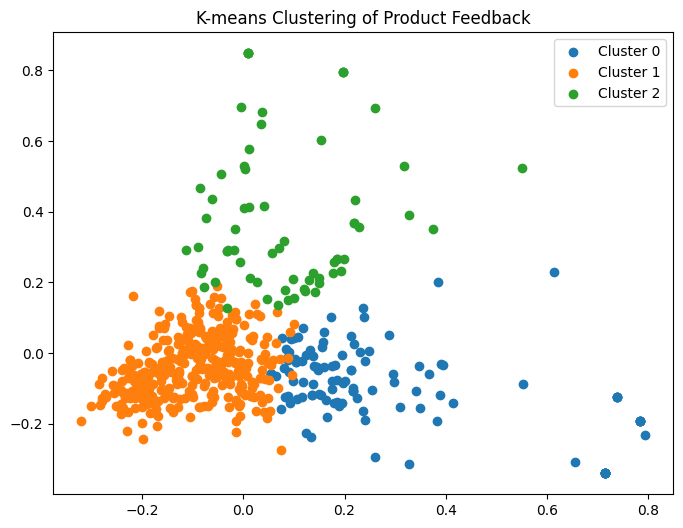

DataFrame with Sentiment:
                                              Feedbacks sentiment
0     Good packaging of the product. Product is rece...  Positive
1     Fourth time using,  Extremely good product. :-...   Neutral
2     I love it especially the smell. My hair gettin...  Negative
3     not that much good...my hairs are curly...and ...  Negative
4     I’ve been using this for about four months now...  Negative
...                                                 ...       ...
1038  I loed this combo of keratin shampoo and condi...  Negative
1039  I just got this one at the right time and i am...  Negative
1040             Fantastic product..... :- Good product  Positive
1041  Terrific Purchase! Thank you so much Wroxy for...  Negative
1043  The poduct was give a good result. :- Very Int...  Positive

[557 rows x 2 columns]

DataFrame after Removing Negative Sentiment:
                                              Feedbacks sentiment
0     Good packaging of the product. Product i

In [79]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming product_data is a DataFrame and 'Feedbacks' is the column with text data
data = product_data['Feedbacks']

# Step 1: Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(data)

# Step 2: Apply K-means clustering
k = 3  # Number of clusters (positive, negative, neutral)
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Step 3: Add cluster labels to the DataFrame
product_data['cluster'] = kmeans.labels_

# Step 4: Analyze clusters
for cluster in range(k):
    print(f"Cluster {cluster}:")
    print(product_data[product_data['cluster'] == cluster]['Feedbacks'].head())
    print("\n")

# Step 5: Visualize clusters using PCA (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(X_pca[product_data['cluster'] == cluster, 0], X_pca[product_data['cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('K-means Clustering of Product Feedback')
plt.legend()
plt.show()

# Step 6: Manually infer sentiment based on clusters
# Inspect the clusters and assign sentiment labels
sentiment_map = {0: 'Positive', 1: 'Negative', 2: 'Neutral'}  # Update based on your cluster analysis
product_data['sentiment'] = product_data['cluster'].map(sentiment_map)

# Step 7: Display the final DataFrame with sentiment
print("DataFrame with Sentiment:")
print(product_data[['Feedbacks', 'sentiment']])

# Step 8: Remove rows with negative sentiment
product_data_cleaned = product_data[product_data['sentiment'] != 'Negative']

# Step 9: Display the cleaned DataFrame
print("\nDataFrame after Removing Negative Sentiment:")
print(product_data_cleaned[['Feedbacks', 'sentiment']])


In [80]:
main_product = product_data_cleaned.drop(columns=['cluster', 'sentiment'])

In [81]:
main_product

,ProductsName,Product Cost,Feedbacks,Details
0,Streax Hair Serum Vitalized With Walnut Oil (...,408.0,Good packaging of the product. Product is rece...,Let dull and frizzy hair be a story of the pas...
1,L'Oréal Professionnel X-Tenso Care Serum | For...,955.2,"Fourth time using, Extremely good product. :-...",The Prokeratin-Incell fusion recharges deplete...
6,Vedix Customised Ayurvedic Hair Fall Serum | P...,758.4,Nice 👏👏👏👍👍 :- Nice :- Poor quality serum,Ayurvedic serum that provides nourishment from...
9,WOW SKIN SCIENCE Hair Loss Control Therapy Ser...,569.6,It's amazing product for frizzy hair......I ha...,Advanced anti-hair loss serum with natural DHT...
11,"LIVON Hair Serum for Women & Men, All Hair Typ...",576.0,very very good product......this serum makes m...,"Get rid of frizzy and unmanageable hair, and e..."
...,...,...,...,...
1023,VAADI HERBALS Superbly Smoothing Heena Shampoo...,768.0,Not good :- good.👍👍👍👍👍👍👍 :- nic product this p...,The shampoo in this combination is an ideal fo...
1024,Khadi Pure Herbal Green Apple Shampoo + Condit...,334.4,Too good,Khadi Pure Gramodyog™ Herbal Green Apple Shamp...
1033,"PINKROOT Milk Protein Shampoo, Conditioner Wit...",1118.4,Nice,"Pink Root Milk Protein Shampoo, Conditioner Wi..."
1040,galway Rupabham Pro Keratin Shampoo+ Condition...,1358.4,Fantastic product..... :- Good product,With this you can keep your hair healthy and n...


### Product recommendation based on Risk

In [82]:


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define risk-level specific keywords
low_risk_keywords = [
    "moisturizing", "shine enhancement", "scalp nourishment", "vitamin-rich", "gentle cleansing",
    "uv protection", "split end repair", "natural oils", "hydration", "softening", "frizz control",
    "shine & gloss", "detangling", "smoothness", "manageability", "silky-smooth", "non-sticky formula",
    "humidity control", "lightweight", "heat protection", "color protection", "daily care", "split ends prevention" ,
      "shine enhancement", "scalp nourishment", "vitamin-rich", "gentle cleansing", "uv protection",
    "split end repair", "natural oils", "hydration", "softening", "frizz control", "shine & gloss",
    "detangling", "smoothness", "manageability", "silky-smooth", "non-sticky formula", "humidity control",
    "lightweight", "heat protection", "color protection", "daily care", "split ends prevention",
    "anti-frizz", "shine & gloss", "straightening & smoothening", "conditioning", "nourishment",
    "volumizer", "styling", "shine & gloss", "anti-frizz", "straightening & smoothening", "shine & gloss",
    "anti-frizz", "shine & gloss", "anti-frizz", "shine & gloss", "anti-frizz", "shine & gloss"
]

medium_risk_keywords = [
    "thickening", "volume boost", "strengthening", "follicle stimulation", "anti-breakage", "scalp revitalization",
    "keratin repair", "protein treatment", "hair growth support", "reducing hair fall", "split ends", "damage repair",
    "nourishment", "conditioning", "anti-frizz", "scalp health", "hair elasticity", "hair strength", "hair repair",
    "thickening", "volume boost", "strengthening", "follicle stimulation", "anti-breakage",
    "scalp revitalization", "keratin repair", "protein treatment", "hair growth support",
    "reducing hair fall", "split ends", "damage repair", "nourishment", "conditioning",
    "anti-frizz", "scalp health", "hair elasticity", "hair strength", "hair repair",
    "anti-hair fall", "growth stimulating", "split-ends", "anti-hair fall", "growth stimulating",
    "split-ends", "anti-hair fall", "growth stimulating", "split-ends", "anti-hair fall",
    "growth stimulating", "split-ends", "anti-hair fall", "growth stimulating", "split-ends"
]

high_risk_keywords = [
    "restorative", "regrowth", "scalp repair", "hair loss", "thinning hair", "hair restoration", "hair rejuvenation",
    "follicle regeneration", "hair growth", "hair fall prevention", "nourishing repair", "damaged hair repair",
    "restorative", "regrowth", "scalp repair", "hair loss", "thinning hair", "hair restoration",
    "hair rejuvenation", "follicle regeneration", "hair growth", "hair fall prevention",
    "nourishing repair", "damaged hair repair", "hair revival", "regenerating serum",
    "hair reactivation", "intensive care", "anti-hair fall", "growth stimulating", "split-ends",
    "anti-hair fall", "growth stimulating", "split-ends", "anti-hair fall", "growth stimulating",
    "split-ends", "anti-hair fall", "growth stimulating", "split-ends", "anti-hair fall",
    "growth stimulating", "split-ends", "anti-hair fall", "growth stimulating", "split-ends"
    "hair revival", "regenerating serum", "hair reactivation", "intensive care"
]

low_risk_keywords = list(set(low_risk_keywords))
medium_risk_keywords = list(set(medium_risk_keywords))
high_risk_keywords = list(set(high_risk_keywords))


def recommend_product(main_product):
    # Get user risk level (using the predict_hair_fall_risk function)
    risk_level = predict_hair_fall_risk(rf_classifier, None, X_train_resampled, y_train_resampled)  # Modify as needed to return the risk level directly

    # Preprocess product details (cleaning, tokenization, vectorization)
    product_details = main_product['Details']  # Assume this is the 'Details' column from your product dataset
    vectorizer = TfidfVectorizer(stop_words='english')
    product_vectors = vectorizer.fit_transform(product_details)

    # Select keywords based on risk level
    if risk_level == "High Risk":
        keywords = high_risk_keywords
    elif risk_level == "Medium Risk":
        keywords = medium_risk_keywords
    else:
        keywords = low_risk_keywords

    # Vectorize the user's condition based on the selected keywords
    user_condition_vector = vectorizer.transform(keywords)

    # Compute the cosine similarity between the user's keywords and product details
    similarity_scores = cosine_similarity(user_condition_vector, product_vectors)

    # Get the indices of the top 5 products based on the highest similarity scores
    avg_similarity_scores = similarity_scores.mean(axis=0)  # Calculate the average similarity for each product
    top_5_indices = np.argsort(avg_similarity_scores)[::-1][:5]  # Sort and get the top 5 products

    # Print details of the top 5 recommended products
    print(f"Top 5 Recommended Products for Your Risk Level: {risk_level}\n")
    
    for i, idx in enumerate(top_5_indices):
        recommended_product = main_product.iloc[idx]
        print(f"Rank {i+1}: {recommended_product['ProductsName']}")
        print(f"Cost: {recommended_product['Product Cost']}")
        print(f"Product Feedback: {recommended_product['Feedbacks']}")
        print('-' * 80)
    return top_5_indices



In [83]:
main_product['Details'].unique()

array(['Let dull and frizzy hair be a story of the past! Add shine to your hair anytime, anywhere using Streax Hair Serum with Walnut Oil. Enriched with the natural goodness of walnut oil and vitamin E, hair feels more manageable, silky-smooth and frizz-free.1 Hair SerumIdeal For: Men & Women Hair Type: All Hair Types For Damaged Hair Formulated For: Straightening & Smoothening',
       'The Prokeratin-Incell fusion recharges depleted moisture levels and controls volume.*  7X** stronger hair.  4X** more manageability.  4X** more hydration.  *Instrumental tests vs non conditioning shampoo.  **Instrumental shampoo + mask + leave-in vs non-conditioning shampoo.  How to use - Apply a small amount to towel-dried hair and spread evenly through lengths and ends. Do not rinse.Serum BottleIdeal For: Men & Women Sulfate Free Hair Type: Straight Hair For Chemically Treated Hair Formulated For: Straightening & Smoothening',
       'Ayurvedic serum that provides nourishment from the roots to regula

In [84]:
main_product.to_csv('main_product.csv', index=False)

### Recommendation based on Content based filtering

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

def get_content_recommendations(selected_product_name, product_data, n_recommendations=5):
    """
    Provides collaborative filtering based recommendations after user selects a product.
    
    Parameters:
    selected_product_name: Name of the product selected by user from initial recommendations
    product_data: DataFrame with columns [ProductsName, Product Cost, Feedbacks, Details]
    n_recommendations: Number of recommendations to return
    
    Returns:
    DataFrame containing recommended products
    """
    # Create item features matrix using Details column
    vectorizer = TfidfVectorizer(stop_words='english')
    item_features = vectorizer.fit_transform(product_data['Details'])
    
    # Calculate item-item similarity matrix
    item_similarity = cosine_similarity(item_features)
    item_similarity_df = pd.DataFrame(
        item_similarity,
        index=product_data['ProductsName'],
        columns=product_data['ProductsName']
    )
    
    # Get similar products
    similar_scores = item_similarity_df[selected_product_name].sort_values(ascending=False)
    similar_products = similar_scores.index[1:n_recommendations+1].tolist()
    
    # Get full details of recommended products
    recommendations = product_data[product_data['ProductsName'].isin(similar_products)].copy()
    
    # Add similarity score to recommendations
    recommendations['SimilarityScore'] = recommendations['ProductsName'].map(similar_scores)
    
    # Sort by similarity score
    recommendations = recommendations.sort_values('SimilarityScore', ascending=False)
    
    return recommendations

def display_collaborative_recommendations(recommendations):
    """
    Displays the collaborative filtering recommendations in a formatted way.
    
    Parameters:
    recommendations: DataFrame containing recommended products
    """
    print("\nBased on your selection, you might also like:\n")
    for idx, row in recommendations.iterrows():
        print(f"Product: {row['ProductsName']}")
        print(f"Cost: {row['Product Cost']}")
        print(f"Product Feedback: {row['Feedbacks']}")
        print(f"Similarity Score: {row['SimilarityScore']:.2f}")
        print('-' * 80)

def complete_recommendation_workflow(product_data):
    """
    Complete workflow combining initial risk-based recommendations and collaborative filtering.
    """
    # Get top 5 recommended product indices
    top_5_indices = recommend_product(product_data)  

    if not isinstance(top_5_indices, (list, np.ndarray)) or len(top_5_indices) == 0:
        print("No recommendations available. Please try again.")
        return
    
    # Get user selection
    while True:
        try:
            selected_rank = int(input(f"\nPlease select a product by entering its rank (1-{min(5, len(top_5_indices))}): "))
            if 1 <= selected_rank <= min(5, len(top_5_indices)):
                break
            print(f"Please enter a number between 1 and {min(5, len(top_5_indices))}.")
        except ValueError:
            print("Please enter a valid number.")

    # Get the selected product's name using `.iloc`
    selected_product_name = product_data.iloc[top_5_indices[selected_rank-1]]['ProductsName']

    # Get and display collaborative recommendations
    collab_recommendations = get_content_recommendations(selected_product_name, product_data)
    display_collaborative_recommendations(collab_recommendations)


In [86]:

complete_recommendation_workflow(main_product)

Please enter the following details:


c:\Users\Nitro\anaconda3\envs\test_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Predicted Hair Fall Risk: Medium Risk
Estimated Age When Hair Fall Might Start: 36.73
Estimated Age When Hair Fall Might Start: 36 years and 9 months
Top 5 Recommended Products for Your Risk Level: Medium Risk

Rank 1: look hair Onion Oil and Onion Shampoo  (500 ml)
Cost: 638.4000000000001
Product Feedback: Best products thank u flipcart :- Very Good product...Thank You Flipkart Excellent :- Good product
--------------------------------------------------------------------------------
Rank 2: Khadi Mauri Amla Bhringraj Shampoo - Pack of 2  (420 ml)
Cost: 478.4
Product Feedback: Good, super :- Best shampoo for hairfall!! :- Nice shampoo..I love it😍
--------------------------------------------------------------------------------
Rank 3: WHEEZAL ARNICA HAIR N SCALP 500 ML  (500)
Cost: 480.0
Product Feedback: Good product.i am using it for last three months but didn't see any significant difference,bt one thing is good which is its homeopathy product so less indulgence of chemicals. :- I l

### Hybrid Recommendation

In [87]:


def get_user_collaborative_recommendations(selected_product_name, product_data, n_recommendations=5):
    """
    Provides user-collaborative filtering recommendations based on product feedback patterns.
    
    Parameters:
    selected_product_name: Name of the product selected by user
    product_data: DataFrame with columns [ProductsName, Product Cost, Feedbacks, Details]
    n_recommendations: Number of recommendations to return
    
    Returns:
    DataFrame containing recommended products
    """
    # Create item-feedback matrix using the Feedbacks column
    vectorizer = TfidfVectorizer(stop_words='english')
    feedback_features = vectorizer.fit_transform(product_data['Feedbacks'].astype(str))
    
    # Calculate item-item similarity based on feedback patterns
    feedback_similarity = cosine_similarity(feedback_features)
    feedback_similarity_df = pd.DataFrame(
        feedback_similarity,
        index=product_data['ProductsName'],
        columns=product_data['ProductsName']
    )
    
    # Get similar products based on feedback patterns
    similar_scores = feedback_similarity_df[selected_product_name].sort_values(ascending=False)
    similar_products = similar_scores.index[1:n_recommendations+1].tolist()
    
    # Get full details of recommended products
    recommendations = product_data[product_data['ProductsName'].isin(similar_products)].copy()
    recommendations['CollaborativeScore'] = recommendations['ProductsName'].map(similar_scores)
    
    return recommendations.sort_values('CollaborativeScore', ascending=False)

def get_hybrid_recommendations(content_recommendations, collab_recommendations, product_data, weight_content=0.5):
    """
    Combines content-based and feedback-based recommendations.
    
    Parameters:
    content_recommendations: DataFrame with content-based recommendations
    collab_recommendations: DataFrame with feedback-based recommendations
    product_data: Original product data
    weight_content: Weight for content-based recommendations (0-1)
    
    Returns:
    DataFrame with hybrid recommendations
    """
    # Normalize similarity scores
    content_recommendations['NormalizedContentScore'] = (
        content_recommendations['SimilarityScore'] - content_recommendations['SimilarityScore'].min()
    ) / (content_recommendations['SimilarityScore'].max() - content_recommendations['SimilarityScore'].min())
    
    collab_recommendations['NormalizedCollabScore'] = (
        collab_recommendations['CollaborativeScore'] - collab_recommendations['CollaborativeScore'].min()
    ) / (collab_recommendations['CollaborativeScore'].max() - collab_recommendations['CollaborativeScore'].min())
    
    # Combine recommendations
    hybrid_recommendations = pd.concat([
        content_recommendations[['ProductsName', 'NormalizedContentScore']],
        collab_recommendations[['ProductsName', 'NormalizedCollabScore']]
    ], axis=0)
    
    # Calculate hybrid score
    hybrid_recommendations['HybridScore'] = hybrid_recommendations['NormalizedContentScore'].fillna(0) * weight_content + \
                                          hybrid_recommendations['NormalizedCollabScore'].fillna(0) * (1 - weight_content)
    
    # Get unique products with highest hybrid scores
    hybrid_recommendations = hybrid_recommendations.groupby('ProductsName')['HybridScore'].max().reset_index()
    hybrid_recommendations = hybrid_recommendations.sort_values('HybridScore', ascending=False)
    
    # Get full product details
    final_recommendations = product_data[product_data['ProductsName'].isin(hybrid_recommendations['ProductsName'])].copy()
    final_recommendations['HybridScore'] = final_recommendations['ProductsName'].map(
        hybrid_recommendations.set_index('ProductsName')['HybridScore']
    )
    
    return final_recommendations.sort_values('HybridScore', ascending=False)

def display_recommendations(recommendations, recommendation_type="Recommendations"):
    """
    Displays recommendations in a formatted way.
    
    Parameters:
    recommendations: DataFrame containing recommended products
    recommendation_type: String indicating the type of recommendations being displayed
    """
    print(f"\n{recommendation_type}:\n")
    for idx, row in recommendations.iterrows():
        print(f"Product: {row['ProductsName']}")
        print(f"Cost: {row['Product Cost']}")
        print(f"Product Feedback: {row['Feedbacks']}")
        score_type = 'HybridScore' if 'HybridScore' in row else \
                    'CollaborativeScore' if 'CollaborativeScore' in row else 'SimilarityScore'
        
        print('-' * 80)

def complete_hybrid_recommendation_workflow(product_data):
    """
    Complete workflow combining content-based, feedback-based, and hybrid recommendations.
    
    Parameters:
    user_input: User's initial input for content-based filtering
    product_data: DataFrame with product information
    """
    # Get initial content-based recommendations
    top_5_indices = recommend_product(product_data)
    
    if not isinstance(top_5_indices, (list, np.ndarray)) or len(top_5_indices) == 0:
        print("No recommendations available. Please try again.")
        return
    
    # Get user selection for content-based recommendations
    while True:
        try:
            selected_rank = int(input(f"\nPlease select a product by entering its rank (1-{min(5, len(top_5_indices))}): "))
            if 1 <= selected_rank <= min(5, len(top_5_indices)):
                break
            print(f"Please enter a number between 1 and {min(5, len(top_5_indices))}.")
        except ValueError:
            print("Please enter a valid number.")
    
    # Get selected product name
    selected_product_name = product_data.iloc[top_5_indices[selected_rank-1]]['ProductsName']
    
    # Get content-based recommendations
    content_recommendations = get_content_recommendations(selected_product_name, product_data)
    display_recommendations(content_recommendations, "Content-based Recommendations")
    
    # Get feedback-based recommendations
    collab_recommendations = get_user_collaborative_recommendations(selected_product_name, product_data)
    display_recommendations(collab_recommendations, "collaborative-based Recommendations")
    
    # Get hybrid recommendations
    hybrid_recommendations = get_hybrid_recommendations(content_recommendations, collab_recommendations, product_data)
    display_recommendations(hybrid_recommendations, "Hybrid Recommendations")

In [89]:
complete_hybrid_recommendation_workflow(main_product)

Please enter the following details:


c:\Users\Nitro\anaconda3\envs\test_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Predicted Hair Fall Risk: Medium Risk
Estimated Age When Hair Fall Might Start: 35.73
Estimated Age When Hair Fall Might Start: 35 years and 9 months
Top 5 Recommended Products for Your Risk Level: Medium Risk

Rank 1: look hair Onion Oil and Onion Shampoo  (500 ml)
Cost: 638.4000000000001
Product Feedback: Best products thank u flipcart :- Very Good product...Thank You Flipkart Excellent :- Good product
--------------------------------------------------------------------------------
Rank 2: Khadi Mauri Amla Bhringraj Shampoo - Pack of 2  (420 ml)
Cost: 478.4
Product Feedback: Good, super :- Best shampoo for hairfall!! :- Nice shampoo..I love it😍
--------------------------------------------------------------------------------
Rank 3: WHEEZAL ARNICA HAIR N SCALP 500 ML  (500)
Cost: 480.0
Product Feedback: Good product.i am using it for last three months but didn't see any significant difference,bt one thing is good which is its homeopathy product so less indulgence of chemicals. :- I l